<a href="https://colab.research.google.com/github/Radityaz/2025_AI_TI1B/blob/main/RikoAdityaZaki_AI_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 8 Supervise Learning Regression dan Classification


## Import Library

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Percobaan

### 1.	Decision Tree

Membaca Iris.csv

In [ ]:
iris = pd.read_csv('Iris.csv')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Menghapus kolom yang tidak diperlukan

In [ ]:
iris.drop('Id',axis=1,inplace=True)

Berikutnya perlu memisahkan antara atribut dan label kemudian membagi data menjadi dua bagian yaitu data testing dan data training

In [ ]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model = tree_model.fit(X_train, y_train)



Menggunakan fungsi Predict()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)


Accuracy:  0.933


Memprediksi spesies dari sebuah bunga

In [ ]:
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])


Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Menggunakan Graphviz

In [ ]:
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)


### 2.	Linear Regression

Membuat data dummy

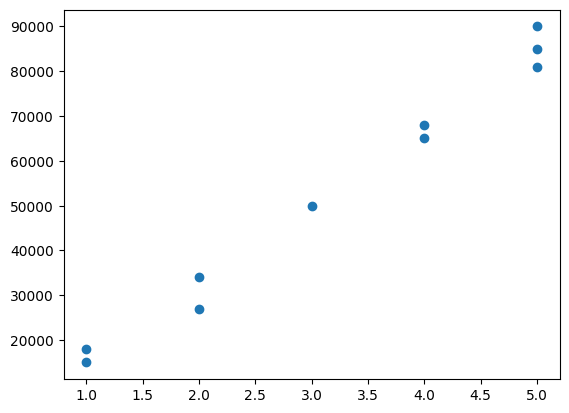

In [4]:

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])
%matplotlib inline

plt.scatter(bedrooms, house_price)


latih model dengan fungsi LinearRegression.fit() dari library SKLearn

Jumlah kamar: 6
Prediksi harga kamar: 102110.16949152542

Jumlah kamar: 7
Prediksi harga kamar: 119542.37288135593



1.0

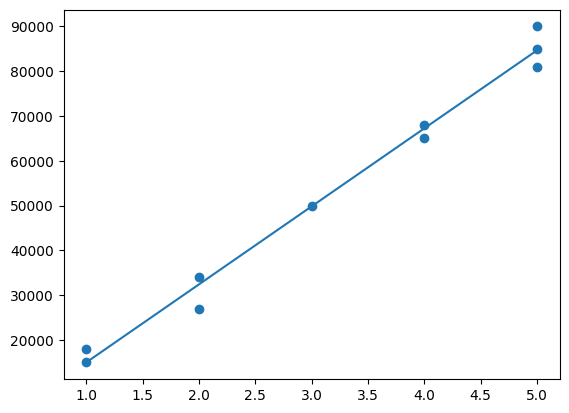

In [8]:
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))
X_test = np.array([[6], [7]])

# Melakukan prediksi harga kamar
y_pred = linreg.predict(X_test)

# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", y_pred[i])
    print()
linreg.score(X_test, y_pred)

### 3.	Logistic Regression

In [18]:
df = pd.read_csv('iklan_sosmed.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID;Jenis_Kelamin;Umur;Gaji;Transaksi  400 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


Menghapus data yang tidak penting

In [16]:
data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']


KeyError: "['User ID'] not found in axis"

## Praktikum

### 1.	Buatlah model maching learning untuk memprediksi calon konsumen melakukan transaksi atau tidak.

Dataset Shape: (400, 5)

Data Types:
ID                int64
Jenis_Kelamin    object
Umur              int64
Gaji              int64
Transaksi         int64
dtype: object

Missing Values:
ID               0
Jenis_Kelamin    0
Umur             0
Gaji             0
Transaksi        0
dtype: int64

Duplicate Rows: 0

Correlation with Transaction:
ID           0.007120
Umur         0.622454
Gaji         0.362083
Transaksi    1.000000
Name: Transaksi, dtype: float64

Decision Tree Classifier Performance:
Accuracy: 82.50%
Confusion Matrix:
[[49  7]
 [ 7 17]]


<ipython-input-21-aa3fb45a0dd4>:98: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
<ipython-input-21-aa3fb45a0dd4>:115: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


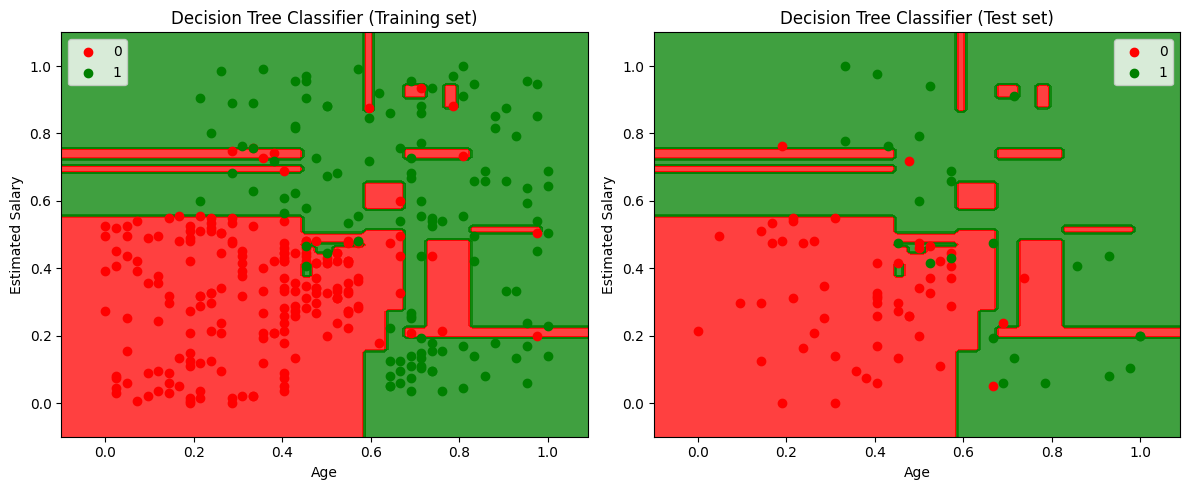


Logistic Regression Performance:
Accuracy: 85.00%
Confusion Matrix:
[[54  2]
 [10 14]]


<ipython-input-21-aa3fb45a0dd4>:98: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
<ipython-input-21-aa3fb45a0dd4>:115: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


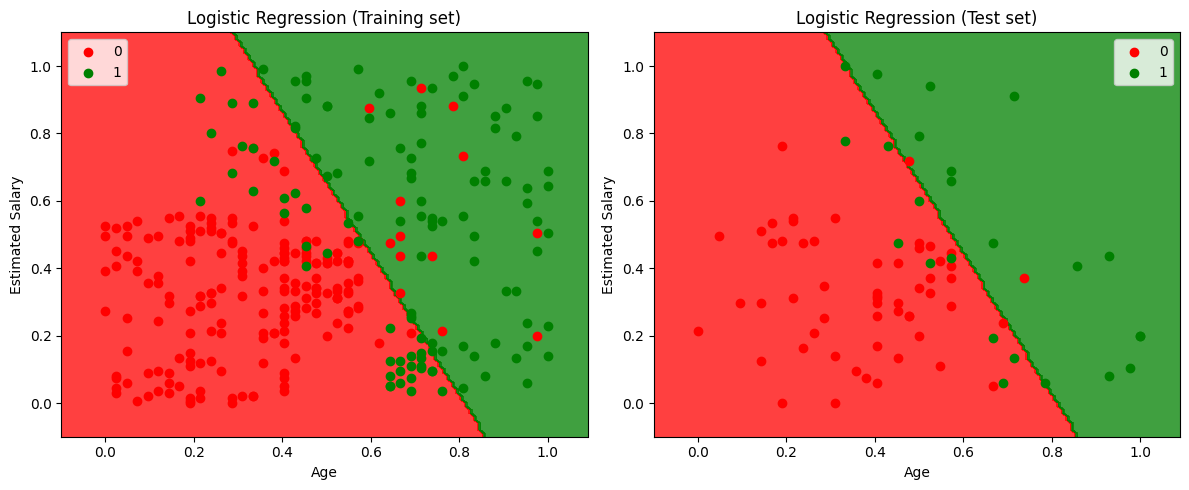

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Load dataset
# Make sure the delimiter is correct. The error message suggests it might be ';' based on the column names in the traceback
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')

# Display dataset info
print("Dataset Shape:", dataset.shape)
print("\nData Types:")
print(dataset.dtypes)
print("\nMissing Values:")
print(dataset.isnull().sum())
print("\nDuplicate Rows:", dataset.duplicated().sum())

# Show correlation with Transaction column
print("\nCorrelation with Transaction:")
# Select only numeric columns before calculating correlation
numeric_cols = dataset.select_dtypes(include=np.number)
# Check if 'Transaksi' is in numeric_cols before accessing
if 'Transaksi' in numeric_cols.columns:
    print(numeric_cols.corr()['Transaksi'])
else:
    print("'Transaksi' column not found or is not numeric.")
X = dataset.iloc[:, 2:-1].values  # Assuming this correctly selects Age and Salary columns
y = dataset.iloc[:, -1].values     # Assuming this correctly selects the Transaction column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Normalize features using MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix:")
    print(cm)

    # Visualize training set results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 0.1, stop=X_set[:, 0].max() + 0.1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 0.1, stop=X_set[:, 1].max() + 0.1, step=0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(f'{model_name} (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()

    # Visualize test set results
    plt.subplot(1, 2, 2)
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 0.1, stop=X_set[:, 0].max() + 0.1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 0.1, stop=X_set[:, 1].max() + 0.1, step=0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(f'{model_name} (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=99)
train_and_evaluate(dt_classifier, "Decision Tree Classifier")

# Logistic Regression
lr_classifier = LogisticRegression(random_state=99)
train_and_evaluate(lr_classifier, "Logistic Regression")

### 2.	Buatlah model maching learning untuk memprediksi gaji pegawai berdasarkan masa kerjanya

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tahun_Pengalaman  30 non-null     float64
 1   Gaji              30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None

Descriptive Statistics:
       Tahun_Pengalaman          Gaji
count         30.000000  3.000000e+01
mean           5.313333  1.140045e+09
std            2.837888  4.112164e+08
min            1.100000  5.659650e+08
25%            3.200000  8.508112e+08
50%            4.700000  9.785550e+08
75%            7.700000  1.508171e+09
max           10.500000  1.835865e+09


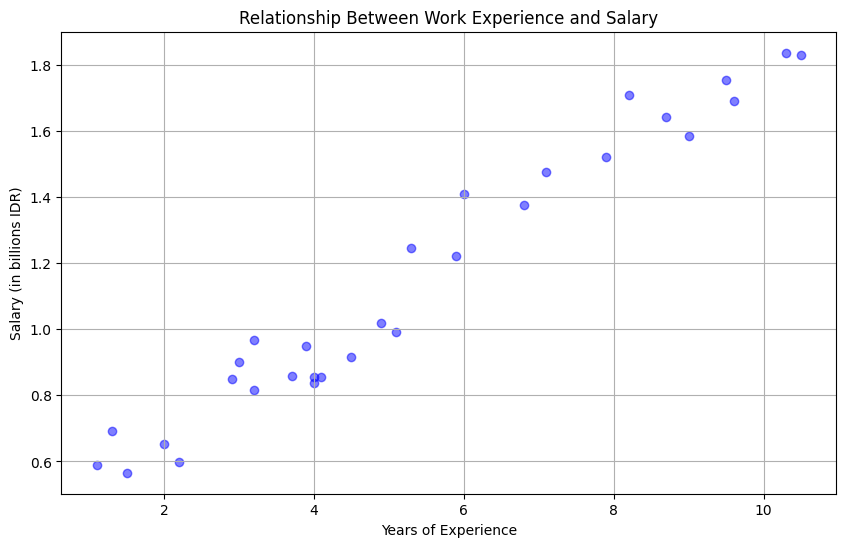


Model Evaluation:
Coefficient (slope): 141357229.85
Intercept: 379823745.18
Mean Squared Error (MSE): 11211771792579374.00
R-squared (R²): 0.9024


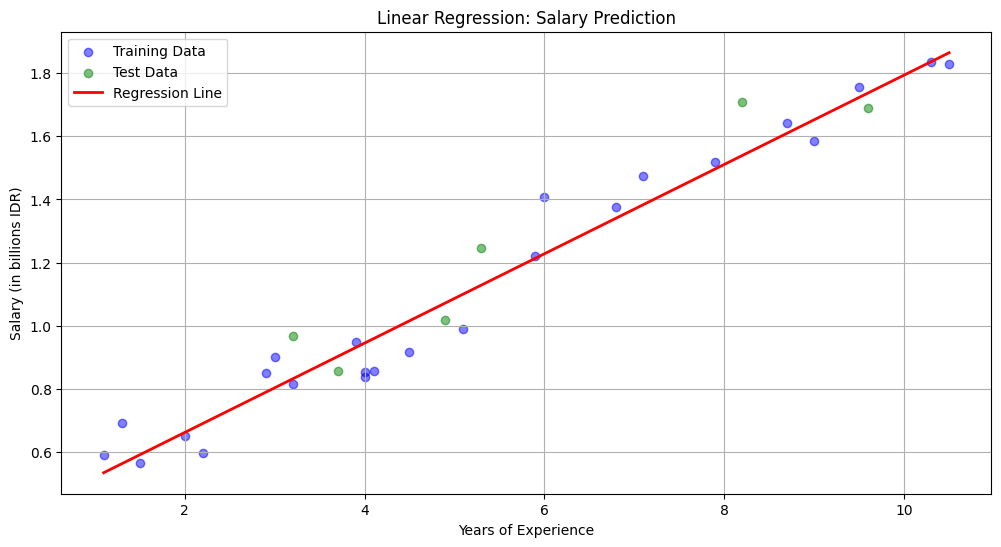


Salary Predictions for New Experience Values:
2.5 years: Rp 733.22 million
5.5 years: Rp 1157.29 million
8.0 years: Rp 1510.68 million
11.0 years: Rp 1934.75 million


In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Data_Gaji.csv', delimiter=';')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

# Visualize the relationship between work experience and salary
plt.figure(figsize=(10, 6))
plt.scatter(data['Tahun_Pengalaman'], data['Gaji']/1e9, color='blue', alpha=0.5)
plt.title('Relationship Between Work Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in billions IDR)')
plt.grid(True)
plt.show()

# Prepare data for modeling
X = data['Tahun_Pengalaman'].values.reshape(-1, 1)  # Features (2D array)
y = data['Gaji'].values  # Target

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize the regression line and predictions
plt.figure(figsize=(12, 6))

# Plot training data
plt.scatter(X_train, y_train/1e9, color='blue', label='Training Data', alpha=0.5)

# Plot test data
plt.scatter(X_test, y_test/1e9, color='green', label='Test Data', alpha=0.5)

# Plot regression line
regression_line = model.predict(X)
plt.plot(X, regression_line/1e9, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in billions IDR)')
plt.legend()
plt.grid(True)
plt.show()

# Predict salary for new experience values
new_experiences = np.array([[2.5], [5.5], [8.0], [11.0]])
predicted_salaries = model.predict(new_experiences)

print("\nSalary Predictions for New Experience Values:")
for exp, salary in zip(new_experiences, predicted_salaries):
    print(f"{exp[0]} years: Rp {salary/1e6:.2f} million")

### Parameter Tuning

1. Parameter Tuning untuk Decision Tree

In [50]:
from sklearn.model_selection import StratifiedKFold
from collections import Counter

# 1. Cek distribusi kelas
class_dist = Counter(y_train)
print("Class distribution:", class_dist)
min_samples = min(class_dist.values())

# 2. Tentukan jumlah fold aman
n_splits = min(5, min_samples) if min_samples >= 2 else 2
print(f"Using {n_splits}-fold CV")

# 3. Gunakan StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=99)

# 4. Parameter grid untuk Decision Tree (disederhanakan)
dt_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 5. GridSearchCV dengan error handling
try:
    dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=99),
                         param_grid=dt_params,
                         cv=cv_strategy,
                         scoring='accuracy',
                         n_jobs=-1)
    dt_grid.fit(X_train, y_train)

    print("\nBest Decision Tree Parameters:", dt_grid.best_params_)
    print("Best CV Accuracy: {:.2f}%".format(dt_grid.best_score_*100))

except ValueError as e:
    print("Error during GridSearch:", e)
    print("\nFallback to simpler validation:")
    from sklearn.model_selection import cross_val_score
    base_dt = DecisionTreeClassifier(max_depth=5, random_state=99)
    scores = cross_val_score(base_dt, X_train, y_train, cv=3)
    print("Simple CV Accuracy: {:.2f}%".format(scores.mean()*100))

Class distribution: Counter({np.int64(1835865000): 1, np.int64(1641465000): 1, np.int64(854355000): 1, np.int64(590145000): 1, np.int64(598365000): 1, np.int64(990435000): 1, np.int64(849630000): 1, np.int64(856215000): 1, np.int64(836910000): 1, np.int64(1519530000): 1, np.int64(693075000): 1, np.int64(565965000): 1, np.int64(1583730000): 1, np.int64(652875000): 1, np.int64(1474095000): 1, np.int64(1754535000): 1, np.int64(1220445000): 1, np.int64(1828080000): 1, np.int64(1376070000): 1, np.int64(816675000): 1, np.int64(948270000): 1, np.int64(916665000): 1, np.int64(1409100000): 1, np.int64(902250000): 1})
Using 2-fold CV
Error during GridSearch: n_splits=2 cannot be greater than the number of members in each class.

Fallback to simpler validation:


ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [52]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor # Use DecisionTreeRegressor for regression
from sklearn.linear_model import LogisticRegression # Keep for Logistic Regression section
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import numpy as np
import pandas as pd # Make sure pandas is imported here if needed
from sklearn.preprocessing import MinMaxScaler # Make sure MinMaxScaler is imported if needed
from sklearn.model_selection import train_test_split
cv_strategy_regression = KFold(n_splits=5, shuffle=True, random_state=99) # Use KFold for regression

# Parameter grid for Decision Tree Regressor
dt_params_regression = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'] # Add max_features as it's common for tree models
}

# GridSearchCV for Decision Tree Regressor
try:
    # Use DecisionTreeRegressor and KFold
    dt_grid_regression = GridSearchCV(DecisionTreeRegressor(random_state=99),
                                    param_grid=dt_params_regression,
                                    cv=cv_strategy_regression, # Use KFold
                                    scoring='neg_mean_squared_error', # Use appropriate scoring for regression
                                    n_jobs=-1)
    # Fit the GridSearchCV model
    dt_grid_regression.fit(X_train, y_train)

    print("\nBest Decision Tree Regressor Parameters:", dt_grid_regression.best_params_)
    # best_score_ is negative MSE, convert to positive RMSE for better interpretability
    print("Best CV RMSE: {:.2f}".format(np.sqrt(-dt_grid_regression.best_score_)))

except ValueError as e:
    print("Error during GridSearch (Regression):", e)
    print("\nFallback to simpler validation (Regression):")
    # Fallback using cross_val_score with KFold
    base_dt_regression = DecisionTreeRegressor(max_depth=5, random_state=99)
    scores_regression = cross_val_score(base_dt_regression, X_train, y_train,
                                      cv=KFold(n_splits=5, shuffle=True, random_state=99), # Use KFold
                                      scoring='neg_mean_squared_error') # Use appropriate scoring
    print("Simple CV RMSE: {:.2f}".format(np.sqrt(-scores_regression.mean())))

# Parameter distribution untuk Logistic Regression
lr_params = {
    'penalty': ['l1', 'l2'], # saga supports l1/l2/elasticnet, liblinear supports l1/l2
    'C': loguniform(1e-4, 100),  # Range nilai C yang lebih luas
    'solver': ['liblinear', 'saga'], # saga and liblinear are common for L1/L2
    'max_iter': [100, 200, 500, 1000], # Increase max_iter
    'class_weight': [None, 'balanced']
}

# Inisialisasi RandomizedSearchCV
# Use StratifiedKFold for classification (Logistic Regression)
cv_strategy_classification = StratifiedKFold(n_splits=5, shuffle=True, random_state=99) # Use StratifiedKFold

lr_random = RandomizedSearchCV(LogisticRegression(random_state=99),
                             param_distributions=lr_params,
                             n_iter=50, # You can increase this for a more thorough search
                             cv=cv_strategy_classification, # Use StratifiedKFold
                             scoring='accuracy',
                             random_state=99,
                             n_jobs=-1)

try:
    lr_random.fit(X_train, y_train) # Ensure these are the correct variables for LR

    # Hasil terbaik
    print("\nBest Logistic Regression Parameters:", lr_random.best_params_)
    print("Best CV Accuracy: {:.2f}%".format(lr_random.best_score_*100))

    # Evaluasi pada test set
    lr_best = lr_random.best_estimator_

    print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_lr)*100)) # Ensure y_test is correct
except ValueError as e:
     print("Error during RandomizedSearch (Logistic Regression):", e)
     print("Common issue: 'elasticnet' with 'liblinear' or 'l1'/'l2' with 'newton-cg', 'lbfgs', 'sag'.")
     print("Ensure compatible solver and penalty combinations.")


Best Decision Tree Regressor Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV RMSE: 100512603.34
Error during RandomizedSearch (Logistic Regression): n_splits=5 cannot be greater than the number of members in each class.
Common issue: 'elasticnet' with 'liblinear' or 'l1'/'l2' with 'newton-cg', 'lbfgs', 'sag'.
Ensure compatible solver and penalty combinations.


2. Parameter Tuning untuk Logistic Regression


Distribusi Kelas (Train): Counter({np.int64(0): 206, np.int64(1): 114})
Distribusi Kelas (Test): Counter({np.int64(0): 51, np.int64(1): 29})

=== Tuning Logistic Regression ===
Best Parameters: {'C': np.float64(1.4482994126937525), 'class_weight': None, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best CV Accuracy: 84.69%

Test Accuracy: 86.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        51
           1       0.80      0.83      0.81        29

    accuracy                           0.86        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.86      0.86      0.86        80


=== Tuning Decision Tree ===
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 9}
Best CV Accuracy: 89.69%

Test Accuracy: 88.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84  

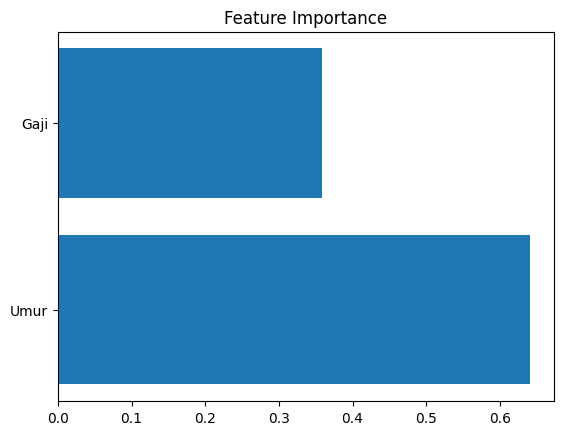

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, randint
from collections import Counter

# 1. Load Data
try:
    data = pd.read_csv('iklan_sosmed.csv', delimiter=';')
    X = data.iloc[:, 2:-1].values  # Kolom Umur dan Gaji
    y = data.iloc[:, -1].values    # Kolom Transaksi
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=99
)

# 3. Normalisasi Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Cek Distribusi Kelas
print("\nDistribusi Kelas (Train):", Counter(y_train))
print("Distribusi Kelas (Test):", Counter(y_test))

# 5. Fungsi untuk Tuning Aman
def safe_randomized_search(X, y, model, params, n_iter=20):
    # Tentukan jumlah fold berdasarkan kelas minoritas
    min_samples = min(Counter(y).values())
    n_splits = min(5, min_samples) if min_samples >= 2 else 2

    cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=99)

    try:
        search = RandomizedSearchCV(
            model,
            param_distributions=params,
            n_iter=n_iter,
            cv=cv_strategy,
            scoring='accuracy',
            random_state=99,
            n_jobs=-1
        )
        search.fit(X, y)
        return search
    except Exception as e:
        print(f"Error during search: {e}")
        return None

# 6. Tuning Logistic Regression
print("\n=== Tuning Logistic Regression ===")
lr_params = {
    'C': loguniform(1e-4, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 300, 500],
    'class_weight': [None, 'balanced']
}

lr_search = safe_randomized_search(X_train, y_train,
                                 LogisticRegression(random_state=99),
                                 lr_params)

if lr_search:
    print("Best Parameters:", lr_search.best_params_)
    print("Best CV Accuracy: {:.2f}%".format(lr_search.best_score_*100))

    y_pred = lr_search.best_estimator_.predict(X_test)
    print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("Fallback to default Logistic Regression")
    lr = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=500)
    lr.fit(X_train, y_train)
    print("Test Accuracy: {:.2f}%".format(lr.score(X_test, y_test)*100))

# 7. Tuning Decision Tree
print("\n=== Tuning Decision Tree ===")
dt_params = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

dt_search = safe_randomized_search(X_train, y_train,
                                 DecisionTreeClassifier(random_state=99),
                                 dt_params)

if dt_search:
    print("Best Parameters:", dt_search.best_params_)
    print("Best CV Accuracy: {:.2f}%".format(dt_search.best_score_*100))

    y_pred = dt_search.best_estimator_.predict(X_test)
    print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("Fallback to default Decision Tree")
    dt = DecisionTreeClassifier(max_depth=5, random_state=99)
    dt.fit(X_train, y_train)
    print("Test Accuracy: {:.2f}%".format(dt.score(X_test, y_test)*100))

# 8. Visualisasi Hasil (Opsional)
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        plt.barh(feature_names, importances)
        plt.title('Feature Importance')
        plt.show()

if 'dt_search' in locals() and dt_search:
    plot_feature_importance(dt_search.best_estimator_, ['Umur', 'Gaji'])